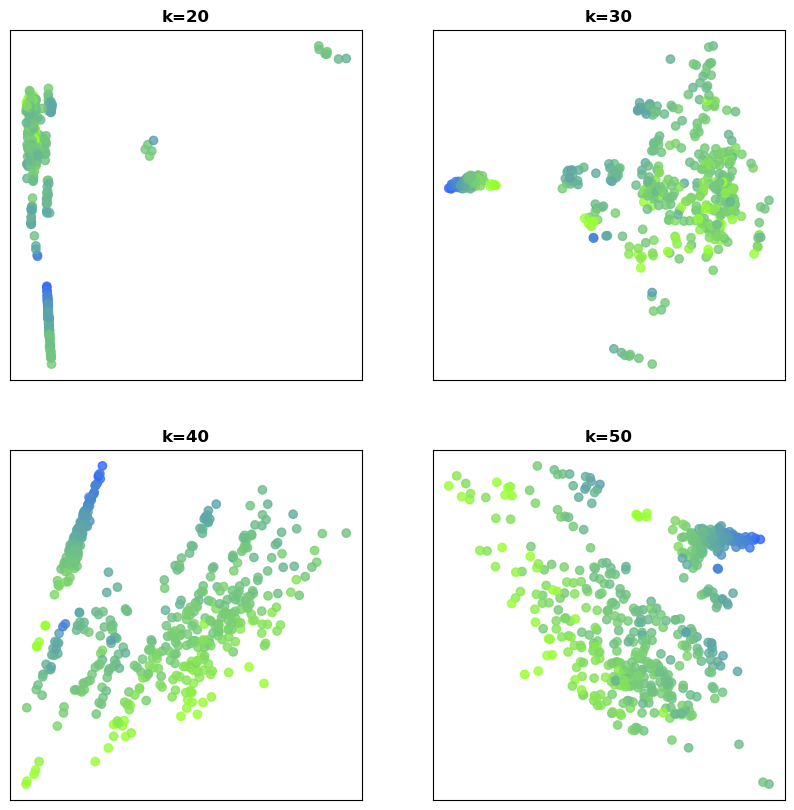

In [3]:
#works on pandas 1.5.3, numpy 1.24.3, matplotlib 3.6.2 and sci-kit learn 1.2.2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
df = pd.read_csv('bostonh.dat', sep='\s+', header=None, names=np.arange(1,15,1))
n_neighbors = [20, 30, 40, 50]
n_components = 2

df2 = pd.DataFrame()
df2[[1,3,5,6,8,9,10,14]] = np.log(df[[1,3,5,6,8,9,10,14]])
df2[4] = df[4]
df2.loc[:,2] = df.loc[:,2]/10
df2.loc[:,7] = (pow(df.loc[:,7],2.5))/10000
df2.loc[:,11] = (np.exp(0.4*df.loc[:,11]))/1000
df2.loc[:,12] = df.loc[:,12]/100
df2.loc[:,13] = pow(df.loc[:,13],0.5)
df2 = df2[np.arange(1,15,1)]

df2 = (df2-df2.mean())/df2.std()

colors = np.zeros((df2.shape[0], 3))  #coloration by prices
colors[:, 2] = np.interp(df2[14], (df2[14].min(), df2[14].max()), (1, 0.2))
colors[:, 1] = np.interp(df2[14], (df2[14].min(), df2[14].max()), (0.4, 1))
colors[:, 0] = np.interp(df2[14], (df2[14].min(), df2[14].max()), (0.2, 0.6))

df2.drop([2,4,6,12], axis = 1, inplace = True)
fig, ax = plt.subplots(2, 2, figsize = (10,10))
ax = ax.ravel()

for i, neighbor in enumerate(n_neighbors):

  LLE = manifold.LocallyLinearEmbedding(
    n_neighbors=neighbor,
    n_components=n_components
    )
  Y = LLE.fit_transform(df2.loc[:, df2.columns])
  ax[i].set_title("k=%d" % neighbor)
  ax[i].scatter(Y[:,0], Y[:,1], c = colors, alpha = 0.8)
  ax[i].set_xticks([])
  ax[i].set_yticks([])

plt.show()